In [94]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import pandas as pd
import numpy as nd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import yfinance as yf
yf.pdr_override()
import warnings
warnings.filterwarnings('ignore')


In [96]:
# Coletando os dados
'''
Utilizamos o get_data para coletar todas as informações do FII
'''
dados = web.get_data_yahoo('MXRF11.SA', period='1y')

[*********************100%***********************]  1 of 1 completed


In [97]:
#Verificando os dados
'''
Apresentando as últimas informações do nosso
'''
dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-13,10.09,10.10,10.07,10.10,10.10,536133
2023-02-14,10.10,10.12,10.09,10.12,10.12,623525
2023-02-15,10.12,10.12,10.10,10.12,10.12,579914
2023-02-16,10.12,10.14,10.11,10.12,10.12,541233
2023-02-17,10.12,10.15,10.12,10.15,10.15,416460


In [98]:
#Estatistica descritiva
'''
Apresenta algumas informações estatísticas de nosso dataframe
'''
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,9.849762,9.893849,9.811508,9.847897,9.306636,6.281470e+05
std,0.348271,0.337645,0.356143,0.352557,0.608877,2.239651e+05
min,9.050000,9.080000,9.000000,9.020000,8.129864,3.058440e+05
25%,9.667500,9.710000,9.600000,9.640000,8.845254,5.025150e+05
50%,9.910000,9.965000,9.885000,9.915000,9.427377,5.781260e+05
75%,10.120000,10.157500,10.092500,10.120000,9.862926,6.914732e+05
max,10.310000,10.320000,10.290000,10.320000,10.150000,2.289342e+06


Text(0.5, 0, 'Período')

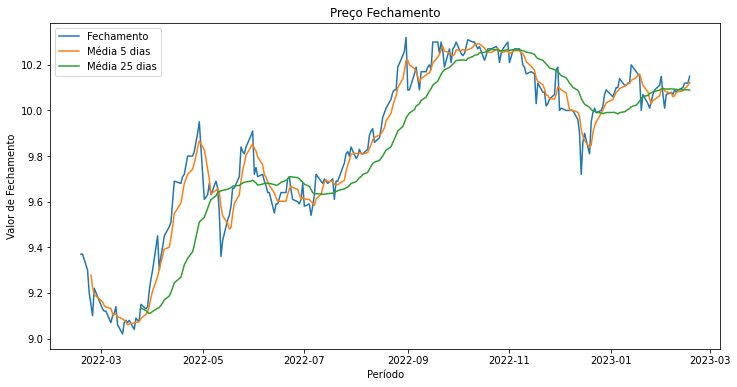

In [99]:
#Criando uma média móvel usando a função rolling
from pandas.core import window
periodo = 5
dados['Close'].rolling(window=periodo).mean()

#Tamanho da imagem
plt.figure(figsize=(12,6))
# Dados do fechamento
plt.plot(dados['Close'])
# Dados da média 5 dias
plt.plot(dados['Close'].rolling(window=periodo).mean())
# Dados da média 25 dias
plt.plot(dados['Close'].rolling(window=periodo+20).mean())
plt.title('Preço Fechamento')
plt.legend(['Fechamento', 'Média 5 dias','Média 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Período')

In [100]:
#Plotly - PX 
periodo = 5
dados['media_movel'] = dados['Close'].rolling(window=periodo).mean()
dados.head()
figure = px.line(dados, y='Close', title='Fechamento')
figure.show()

In [101]:
#Plotly - GO
figure_02 = go.Figure(
    data=go.Scatter(
        x=dados.index, 
        y=dados['Close'],
        line=(dict(color='firebrick',width=3))
        ))

figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Período',
    yaxis_title='Preço de Fechamento'
)
figure_02.show()

In [102]:
#Plotly - GO - Gráfico candlestik
grafico_candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close']
        )
    ]
)
grafico_candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise de Fechamento',
    xaxis_title='Período',
    yaxis_title='Preço de Fechamento'
)
grafico_candlestick.show()

In [103]:
#Criando a figura
figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

#Layout e Dimensão
figura.update_layout(
    width=1000,
    # width=400,    #formato mobile
    height=800,
    title_text='<b>Advanced Analytics</b> <br> Follow-up MXRF11'
)

#Adcionando um grafico na primeira posição
figura.add_trace(
    go.Candlestick(
        x=dados.index,
        open=dados['Open'],
        high=dados['High'],
        low=dados['Low'],
        close=dados['Close'],
        name='Análise'
    ),
    row=1, col=1
)
figura.update_layout(
    xaxis_rangeslider_visible=False
)

#Adcionando um grafico na segunda posição
figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2,col=1
)

figura.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['media_movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2,col=1
)

#Ajustando a legenda
figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict(size=10)
    )
)

figura.add_annotation(
    showarrow=False,
    text='By: @Vinícius Azevedo',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

figura.show()

In [104]:
# !pip install -U kaleido

In [105]:
#Exportando gráfico em PDF
# figura.write_image('Reporte_Financeiro.pdf')